In [35]:
import openai
from dotenv import dotenv_values
config = dotenv_values(".env")
openai.api_key = config['OPEN_API_KEY']
assert openai.api_key.startswith('sk-'), 'Error loading the API key. The API key should start with "sk-""'

In [37]:
def create_meals(ingredients, kcal=200):
    prompt = f'''Create a healthy daily meal plan for breakfast, lunch and dinner based on the following
    ingredients {ingredients}.
    Explain each recipe.
    The total daily intake of kcal should be below {kcal}.
    Assign a suggestive and concise title to each meal.
    Your answer should end with 'Titles: ' and the title of each recipe.
    
    '''
    # print(prompt)
    messages = [
        {'role':'system', 'content': 'You are a talented cook'},
        {'role':'user', 'content':prompt}
    ]
    
    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=messages,
        temperature=1,
        max_tokens=1024,
        n=1
    )
    
    return response['choices'][0].message.content

foods = 'broccoli, chicken, fish, vegetables, cabbage, eggs, olive oil'
output = create_meals(foods)
print(output)

Breakfast: Broccoli and Egg Scramble
Ingredients:
- 1 cup broccoli florets
- 2 eggs
- 1 tablespoon olive oil

Instructions:
1. Heat the olive oil in a pan over medium heat.
2. Add the broccoli florets and cook for 3-4 minutes until slightly tender.
3. In a small bowl, whisk the eggs together.
4. Pour the eggs into the pan with the broccoli.
5. Continuously stir the mixture until the eggs are scrambled and cooked to your liking.
6. Season with salt and pepper if desired.
7. Serve hot.

Title: Nutrient Packed Scramble

Lunch: Grilled Chicken and Vegetable Salad
Ingredients:
- 4 ounces grilled chicken breast
- 1 cup mixed vegetables (carrots, bell peppers, zucchini, etc.)
- 1 tablespoon olive oil

Instructions:
1. Preheat a grill or grill pan to medium-high heat.
2. Rub the chicken breast with olive oil and season with salt and pepper.
3. Grill the chicken for 6-8 minutes on each side, or until cooked through.
4. Remove the chicken from the grill and let it rest for a few minutes before s

In [38]:
titles = output.splitlines()[-3:]
print(titles)

['- Nutrient Packed Scramble', '- Grilled Chicken Delight', '- Baked Fish Delight']


In [39]:
titles = [t.strip('- ') for t in titles]
print(titles)

['Nutrient Packed Scramble', 'Grilled Chicken Delight', 'Baked Fish Delight']


Nutrient Packed Scramble.png
Grilled Chicken Delight.png
Baked Fish Delight.png


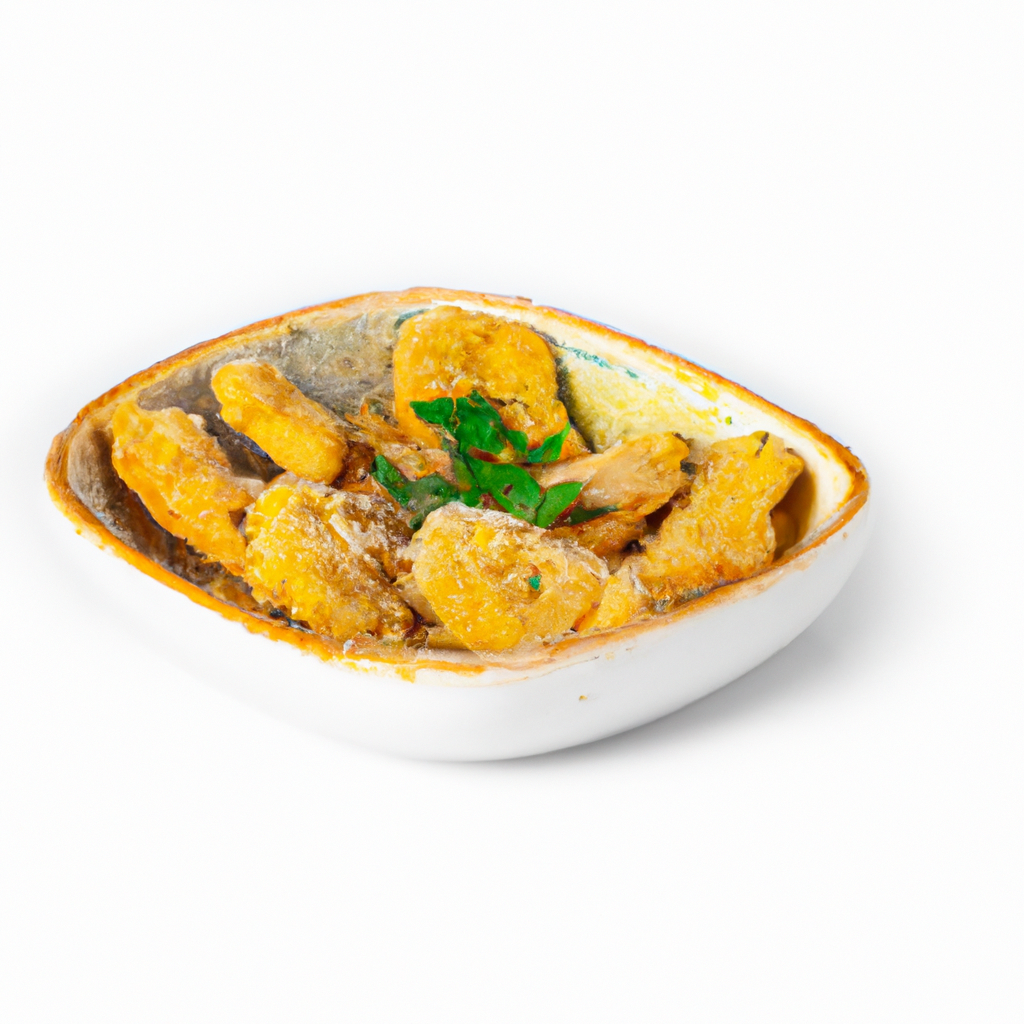

In [42]:
def create_and_save_image(title,extra=''):
    import requests
    # libray to work with files and directories
    import shutil
    
    image_prompt =f'{title},{extra}, high quality food photography'
    response = openai.Image.create(
        prompt=image_prompt,
        n=1,
        size='1024x1024'
    )
    
    #print(response)
    image_url=response['data'][0]['url']
    #print()
    #print(image_url)
    
    #stream=True to get the raw content of the response
    image_resource = requests.get(image_url, stream=True)
    #print(image_resource.status_code)
    #print(image_resource.raw)

    
    image_filename = f'{title}.png'
    if image_resource.status_code == 200:
        with open(image_filename, 'wb') as f:
            shutil.copyfileobj(image_resource.raw, f)
            return image_filename
    else:
        print('Error accessing the image!')
        return false
    
image_filename = create_and_save_image(titles[0], 'white background')
print(image_filename)

from PIL import Image
Image.open(image_filename)

image_filename2 = create_and_save_image(titles[1], 'white background')
print(image_filename2)
Image.open(image_filename2)

image_filename3 = create_and_save_image(titles[2], 'white background')
print(image_filename3)
Image.open(image_filename3)


#for _ in range(3):
#    image_filename = create_and_save_image(titles[_], 'white background')
#    print(image_filename)

